In [3]:
import os
import glob
import pickle
import torch
import os
from torch.utils.data import Dataset, DataLoader
import sys, os
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

from diffusion_data_loader import DiffusionPolicyDataset

trajectory_dir = "../data_collection/trajectories"

In [13]:
# horizons (same convention as Push‑T example)
pred_horizon   = 16  # p
obs_horizon    = 8   # o
action_horizon = 8   # a
subsample: int = 2,

#|o|o|                             observations: 2
#| |a|a|a|a|a|a|a|a|               actions executed: 8
#|p|p|p|p|p|p|p|p|p|p|p|p|p|p|p|p| actions predicted: 16

dataset = DiffusionPolicyDataset(
    dataset_path   = trajectory_dir,
    pred_horizon   = pred_horizon,
    obs_horizon    = obs_horizon,
    action_horizon = action_horizon,
    subsample      = subsample,
)

print("min/max for each dim -> dataset.stats['state'] / ['action']")

dataloader = DataLoader(
    dataset,
    batch_size          = 256,
    num_workers         = 1,
    shuffle             = True,
    pin_memory          = True,
    persistent_workers  = True,
)

# quick sanity‑check
batch = next(iter(dataloader))
print("batch['obs'].shape   :", batch["obs"].shape)      # expected (batch_size, obs_horizon, state_dim)
print("batch['action'].shape:", batch["action"].shape)   # expected (batch_size, pred_horizon, action_dim)

min/max for each dim -> dataset.stats['state'] / ['action']
batch['obs'].shape   : torch.Size([256, 8, 10])
batch['action'].shape: torch.Size([256, 16, 8])


torch.Size([16, 8])
tensor([0.2400, 0.2133, 0.1867, 0.1600, 0.1333, 0.1067, 0.0800, 0.0533, 0.0267,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


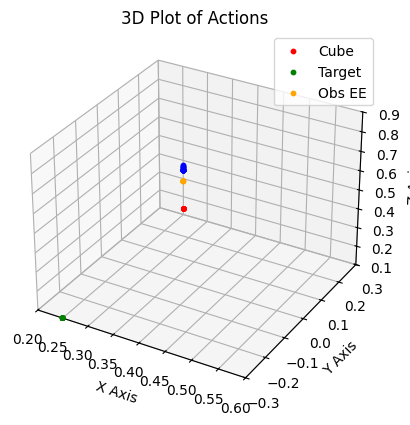

In [19]:
def plot_many_samples(batch):
    # extract observations from batch 0
    obs = batch['obs'][0]
    # extract the x,y,z coordinates
    cube_x_obs = obs[:, 0]
    cube_y_obs = obs[:, 1]
    cube_z_obs = obs[:, 2]

    # extract target observations from batch 0
    target_x_obs = obs[:, 3]
    target_y_obs = obs[:, 4]
    target_z_obs = obs[:, 5]

    obs_x = obs[:, 7]
    obs_y = obs[:, 8]
    obs_z = obs[:, 9]

    # extract actions from batch 0
    actions = batch['action'][0]
    print(actions.shape)
    # extract the x,y,z,
    x = actions[:, 0]
    y = actions[:, 1]
    z = actions[:, 2]

    gripper = actions[:, 7]

    # plot the actions 3D graph
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    print(gripper)
    # if gripper is 1 then plot x,y,z, as pink
    for i in range(len(gripper)):
        # print(gripper[i])
        if gripper[i] > 0.5:
            ax.scatter(x[i], y[i], z[i], color='pink', s=10)
        else:
            ax.scatter(x[i], y[i], z[i], color='blue', s=10)

    
    # ax.scatter(x, y, z, color='blue', label='Actions', s=10)
    ax.scatter(cube_x_obs, cube_y_obs, cube_z_obs, color='red', label='Cube', s=10)
    ax.scatter(target_x_obs, target_y_obs, target_z_obs, color='green', label='Target', s=10)
    ax.scatter(obs_x, obs_y, obs_z, color='orange', label='Obs EE', s=10)
    ax.set_xlabel('X Axis')
    ax.set_ylabel('Y Axis')
    ax.set_zlabel('Z Axis')
    ax.set_title('3D Plot of Actions')
    # fix the axis limits
    ax.set_xlim([0.2, 0.6])
    ax.set_ylim([-0.3, 0.3])
    ax.set_zlim([0.1, 0.9])
    ax.legend()
    plt.show()

batch = next(iter(dataloader))
plot_many_samples(batch)